# Data storytelling using matplotlib - bar chart

<div style="max-width: 60ch">

- [data source](https://www.kaggle.com/datasets/dmi3kno/newcarsalesnorway)

> in this lecture notebook I have chosed to copy the code throughout several different data storytelling transformations as it makes the notebook easier to follow 
> in reality when creating these storytelling graphs I'd build reusable functions to keep the code DRY

</div>


In [75]:
import pandas as pd
import duckdb
from constants import GRAY_1, GRAY_2, GRAY_3, BLUE_1


df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [76]:
df_quantity_brand = duckdb.query(
    """
             SELECT make AS Brand, SUM(quantity) as Quantity 
             FROM df 
             GROUP BY make 
             ORDER BY quantity DESC"""
).df().set_index("Brand")

df_quantity_brand.head()

,Quantity
Brand,
Volkswagen,206669.0
Toyota,168177.0
Volvo,99937.0
Ford,99713.0
BMW,73315.0


## Bar charts

### initial chart

- very hard to read
- many car brands that don't get bought too much


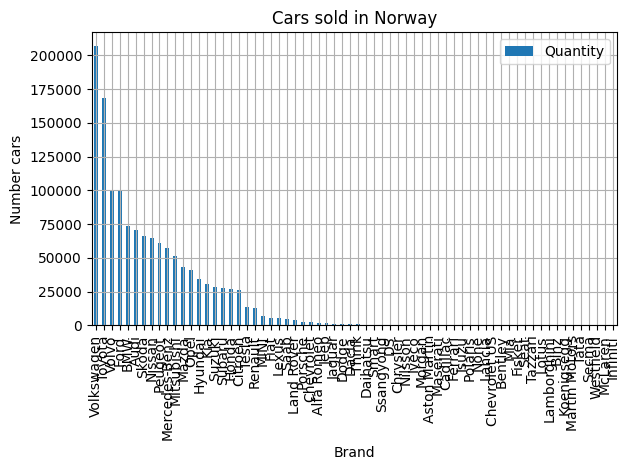

In [77]:
# using dataframes plot method which is a wrapper for matplotlib
ax = df_quantity_brand.plot(
    kind="bar",
    y="Quantity",
    title="Cars sold in Norway",
    ylabel="Number cars",
)
ax.grid()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/cars_brand_sold.png")

## Pick out top 10 cars to focus

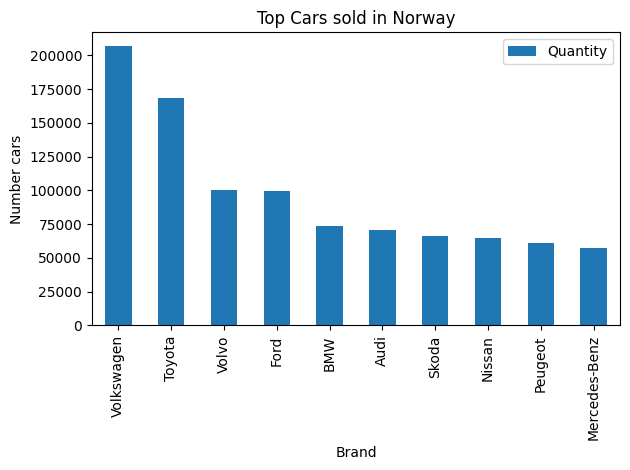

In [78]:
from matplotlib.ticker import FuncFormatter

# using dataframes plot method which is a wrapper for matplotlib
ax = df_quantity_brand.iloc[:10].plot(
    kind="bar",
    y="Quantity",
    title="Top Cars sold in Norway",
    ylabel="Number cars",
)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/top_cars_sold.png")


## Applied data storytelling

- attention
- contrast 
- descriptive title 
- proximity with annotation
- turned into percentage
- horizontal bar 
- clearer xlabel and ylabel
- removed clutter

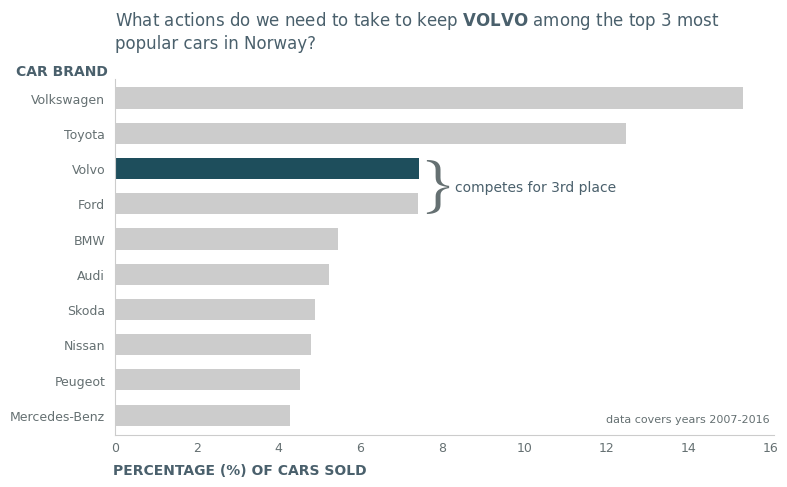

In [79]:
df_percentage = (
    df_quantity_brand["Quantity"] / df_quantity_brand["Quantity"].sum() * 100
).iloc[:10]

colors = [GRAY_1] * len(df_percentage)
colors[2] = BLUE_1

# using dataframes plot method which is a wrapper for matplotlib
ax = df_percentage.plot(
    kind="barh", y="Quantity", figsize=(8, 5), width=0.6, color=colors
)

# requires since horizontal bars place first row in bottom by default
ax.invert_yaxis()
ax.legend().remove()
ax.spines[["top", "right"]].set_visible(False)

ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params(axis="both", labelsize=9, colors=GRAY_2, length=0, pad=5)
ax.tick_params(axis="y", pad=7)

ax.set_xlabel("PERCENTAGE (%) OF CARS SOLD", color=GRAY_3, fontweight="bold")
ax.set_ylabel("CAR BRAND", rotation=0, color=GRAY_3, fontweight="bold")

ax.set_title(
    r"What actions do we need to take to keep"
    + r" $\bf{VOLVO}$"
    + " among the top 3 most \npopular cars in Norway?",
    pad=22,
    color=GRAY_3,
    loc="left",
)

ax.xaxis.set_label_coords(0.19, -0.08)
ax.yaxis.set_label_coords(-0.08, 1)

ax.annotate(xy=(7.5, 2.97), text="}", fontsize=45, family="Times", color=GRAY_2)

ax.annotate(
    xy=(8.3, 2.65),
    text="competes for 3rd place",
    fontsize=10,
    color=GRAY_3,
)

ax.annotate(
    xy=(12, 9.2),
    text="data covers years 2007-2016",
    fontsize=8,
    color=GRAY_2,
)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/cars_percentage_storytelling.png")